# Data Science Academy - Python Fundamentos - Capítulo 6

## Mini-Projeto 1 - Guia de Análise Exploratória de Dados com Python e Linguagem SQL title

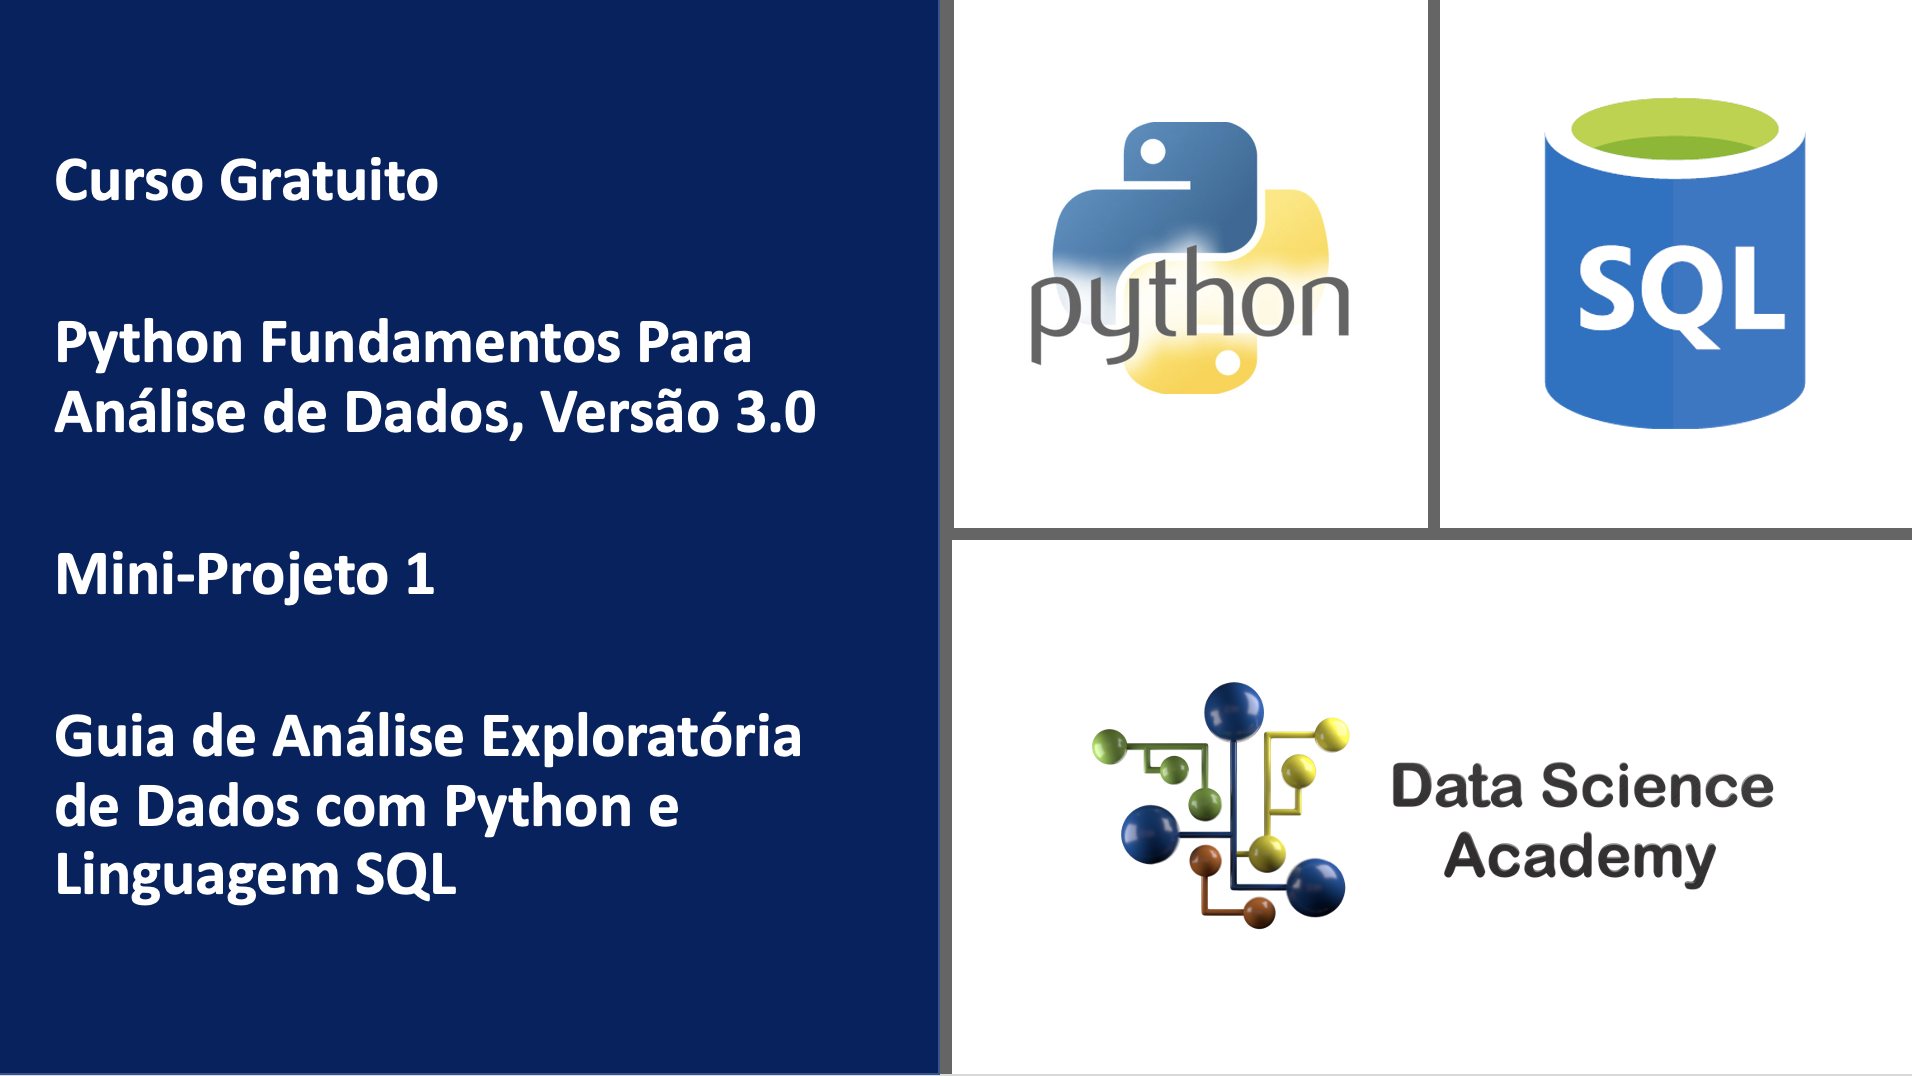

#### Neste Mini-Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no [IMDB](https://www.imdb.com/interfaces/).

#### Guias avançados de Análise Exploratória de Dados são fornecidos na Formação Cientista de Dados.

#### Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

* 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
* 2- Qual o Número de Títulos Por Gênero?
* 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
* 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
* 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
* 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
* 7- Qual a Relação Entre Duração e Gênero?
* 8- Qual o Número de Filmes Produzidos Por País?
* 9- Quais São os Top 10 Melhores Filmes?
* 10- Quais São os Top 10 Piores Filmes?


# Instalando e Carregando Pacotes

In [161]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.0


In [162]:
# Instala o pacote
!pip install -q imdb-sqlite

In [163]:
# Instala o pacote
# https://pypi.org/project/pycountry/
!pip install -q pycountry


In [164]:
# Imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

# Carregando os Dados
#### Primeiro temos que baixar os dados!

In [165]:
%%time
!imdb-sqlite

CPU times: total: 15.6 ms
Wall time: 312 ms


2022-12-11 20:37:17,401 DB already exists: (imdb.db). Refusing to modify. Exiting


In [166]:
# Conecta ao banco de dados
conn = sqlite3.connect('imdb.db')

In [167]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [168]:
type(tabelas)

pandas.core.frame.DataFrame

In [169]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [170]:
# Vamos converter o dataframe em uma lista
tabelas = tabelas['Table_Name'].values.tolist()

In [171]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
#### Quais são os principais tipos (categorias) dos títulos (filmes)?

In [172]:
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

In [173]:
resultado1 = pd.read_sql_query(consulta1, conn)

In [174]:
display(resultado1)

,type,COUNT
0,movie,629202
1,short,903358
2,tvEpisode,7131939
3,tvMiniSeries,46293
4,tvMovie,138574
5,tvPilot,2
6,tvSeries,235329
7,tvShort,10769
8,tvSpecial,39480
9,video,268232


In [175]:
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [176]:
display(resultado1)

,type,COUNT,percentual
0,movie,629202,6.667948
1,short,903358,9.573307
2,tvEpisode,7131939,75.580490
3,tvMiniSeries,46293,0.490589
4,tvMovie,138574,1.468533
5,tvPilot,2,0.000021
6,tvSeries,235329,2.493891
7,tvShort,10769,0.114124
8,tvSpecial,39480,0.418388
9,video,268232,2.842580


In [177]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'



In [178]:
# vizualizar
others

{'COUNT': 771718, 'percentual': 8.178256180416367, 'type': 'others'}

In [179]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [180]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)


In [181]:
# Ordena o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [182]:
# Visualizar
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,7131939,75.580490
1,short,903358,9.573307
3,others,771718,8.178256
0,movie,629202,6.667948


In [183]:
# Ajusta os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

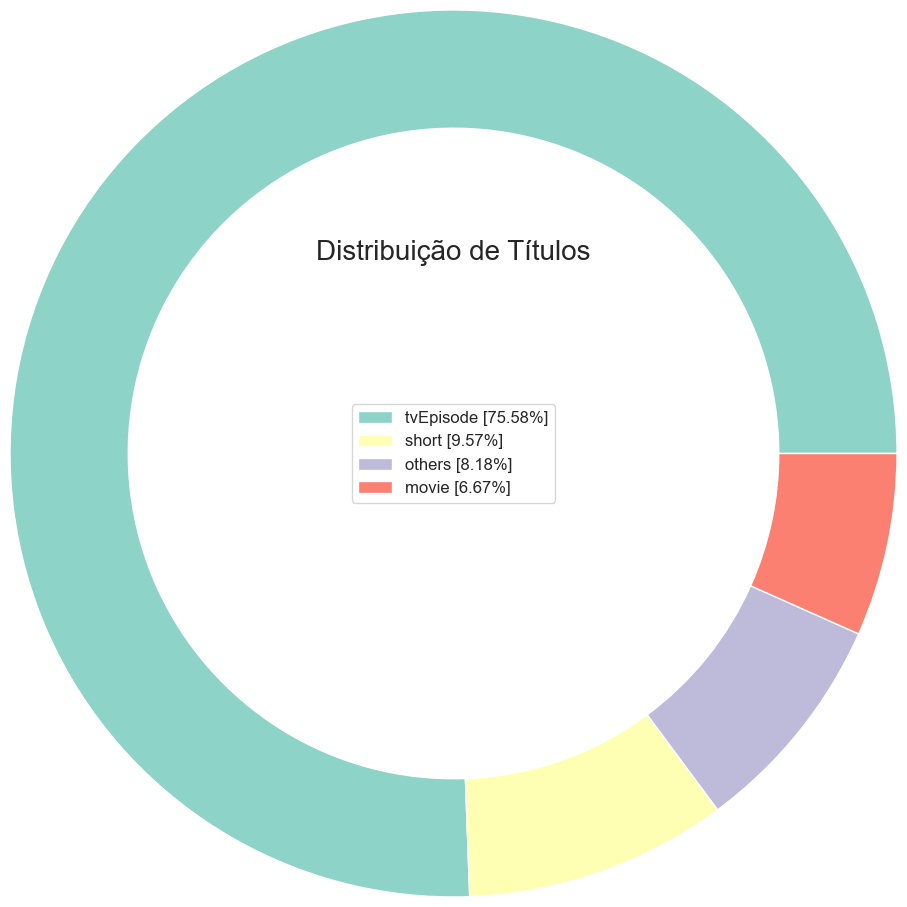

In [184]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

# 2- Qual o Número de Títulos Por Gênero?
#### Vamos calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [185]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''

In [186]:
resultado2 = pd.read_sql_query(consulta2, conn)

In [187]:
display(resultado2)

,genres,COUNT(*)
0,Action,14338
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1463,"Thriller,Western",42
1464,War,1312
1465,"War,Western",15
1466,Western,5182


In [188]:
resultado2['genres'] = resultado2['genres'].str.lower().values

In [189]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

#### Usamos o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero.

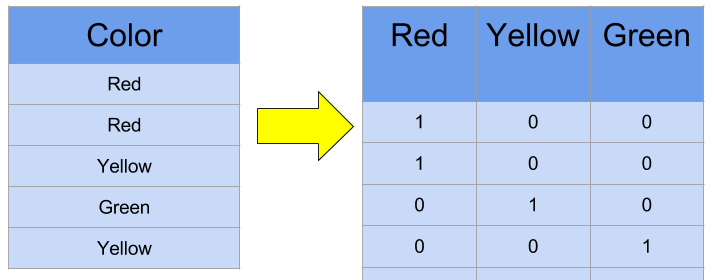

In [190]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [191]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [192]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [193]:
type(bag_generos)

scipy.sparse._csr.csr_matrix

In [194]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names_out()


In [195]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [196]:
# Visualizar
generos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   action        1468 non-null   int64
 1   adult         1468 non-null   int64
 2   adventure     1468 non-null   int64
 3   animation     1468 non-null   int64
 4   biography     1468 non-null   int64
 5   comedy        1468 non-null   int64
 6   crime         1468 non-null   int64
 7   documentary   1468 non-null   int64
 8   drama         1468 non-null   int64
 9   experimental  1468 non-null   int64
 10  family        1468 non-null   int64
 11  fantasy       1468 non-null   int64
 12  film-noir     1468 non-null   int64
 13  game-show     1468 non-null   int64
 14  history       1468 non-null   int64
 15  horror        1468 non-null   int64
 16  music         1468 non-null   int64
 17  musical       1468 non-null   int64
 18  mystery       1468 non-null   int64
 19  n             1468 non-null

In [197]:
generos = generos.drop(columns = 'n', axis = 0)

In [198]:
generos_percentual = 100 * pd.Series(generos.sum().sort_values(ascending = False) / generos.shape[0])

In [199]:
generos_percentual.head(10)

drama          17.915531
comedy         16.893733
documentary    15.940054
adventure      14.509537
action         14.373297
romance        13.283379
crime          13.079019
mystery        12.397820
thriller       12.329700
fantasy        12.261580
dtype: float64

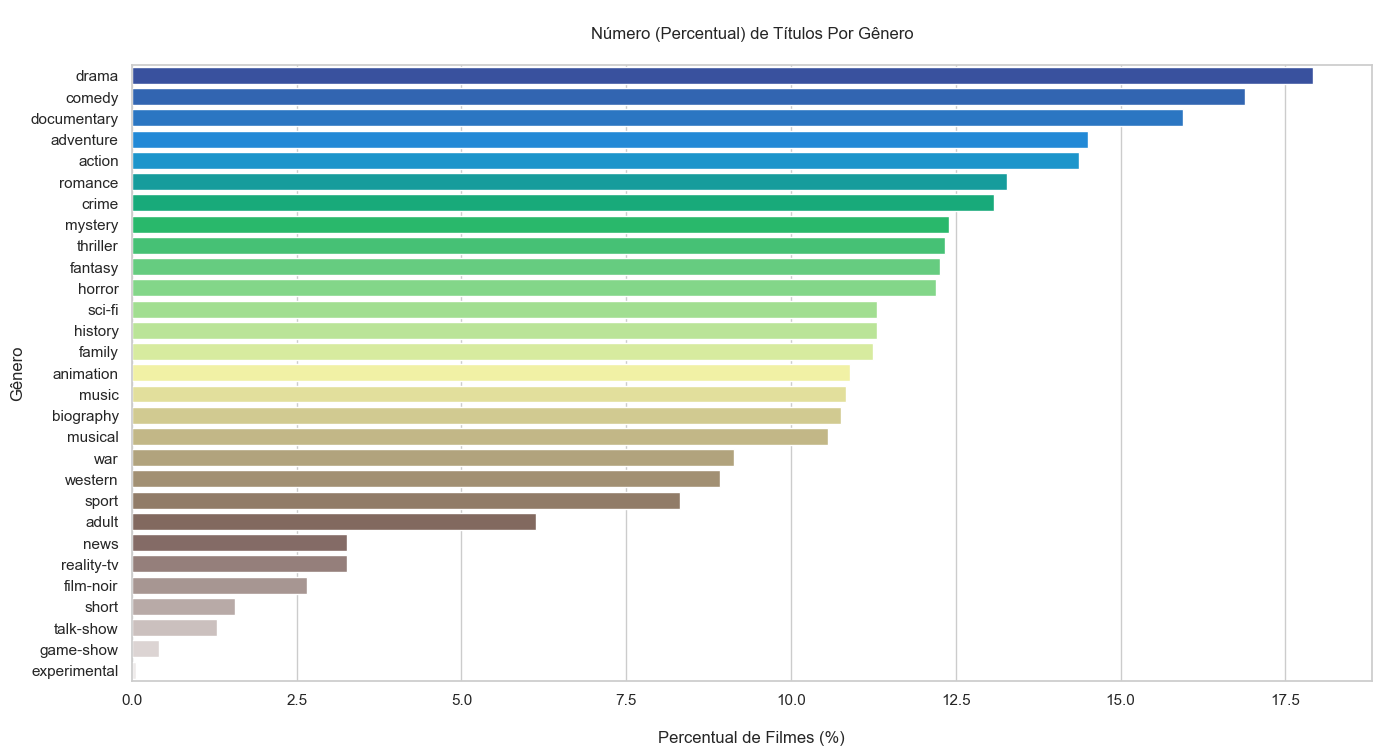

In [200]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

# 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
#### Mediana de avaliação dos filmes.

In [201]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 


In [202]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

In [203]:
# Visualizar
display(resultado3)

,rating,genres
0,5.3,Romance
1,5.2,"Documentary,News,Sport"
2,4.2,\N
3,6.0,"Action,Adventure,Biography"
4,5.1,Drama
...,...,...
284029,5.8,Thriller
284030,6.4,"Drama,History"
284031,3.8,"Adventure,History,War"
284032,8.3,Drama


In [204]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names_out()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos


In [205]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

In [206]:
# vizualizar
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [207]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [208]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [209]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [210]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,29438,5.8
1,adult,4166,5.7
2,adventure,17853,6.0
3,animation,4908,6.6
4,biography,8774,7.0
5,comedy,70249,6.0
6,crime,24555,6.1
7,documentary,43260,7.3
8,drama,126212,6.4
9,family,10981,6.3


In [211]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [212]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

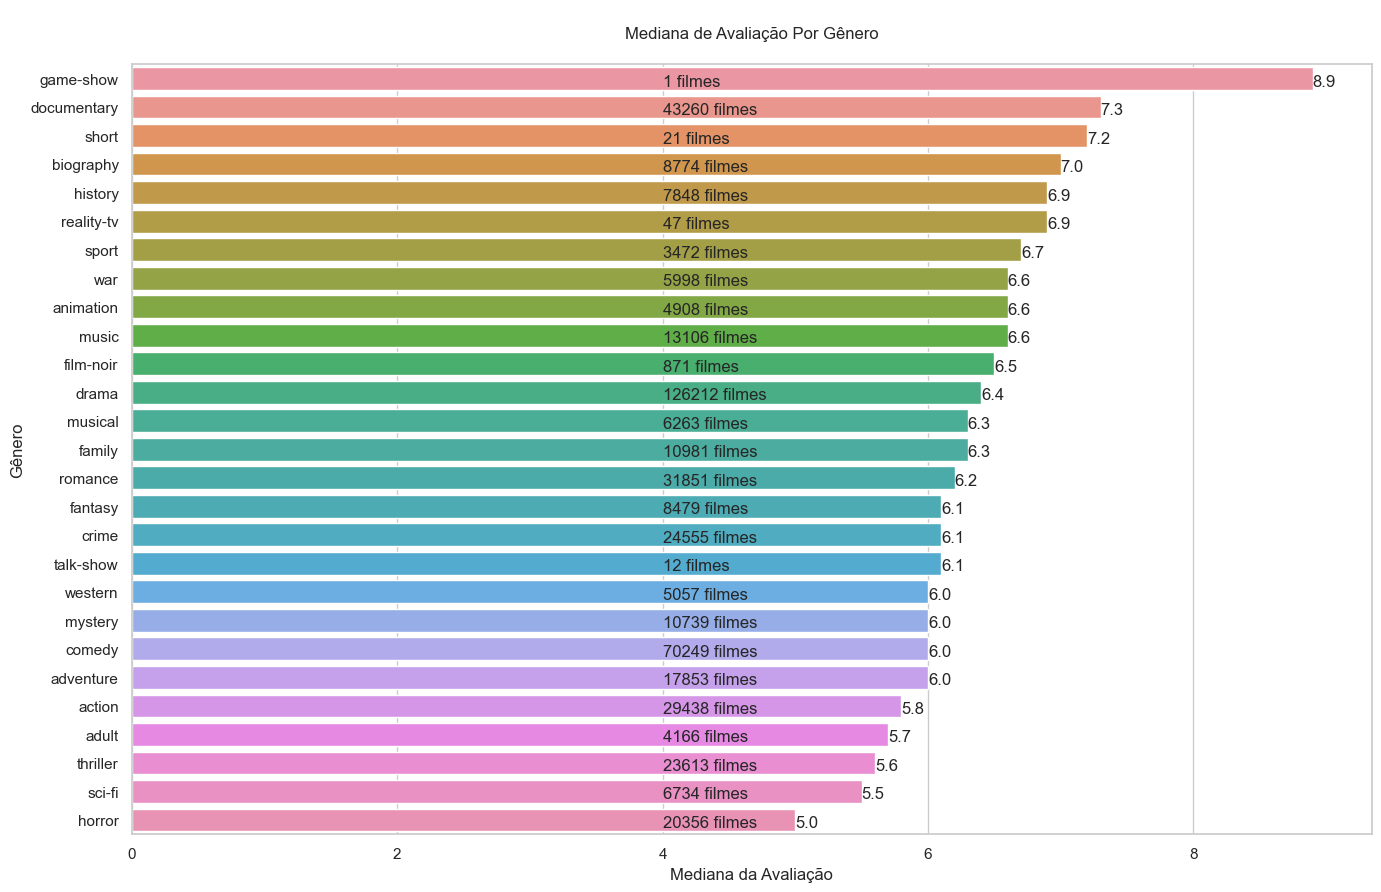

In [213]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()


# 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
#### Mediana de avaliação dos filmes.

In [214]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 


In [215]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

In [216]:
display(resultado4)

,Rating,premiered
0,5.3,1894
1,5.2,1897
2,4.5,1897
3,3.9,1899
4,3.4,1899
...,...,...
284029,6.8,2022
284030,3.4,2022
284031,5.5,2022
284032,3.9,2022


In [217]:

# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [218]:
type(ratings)

list

In [219]:
ratings[1:10]


[4.85, 3.65, 5.85, 4.3, 3.3, 5.25, 5.3, 4.300000000000001, 3.1]

In [220]:
# Lista de anos
anos = list(set(resultado4['premiered']))

In [221]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

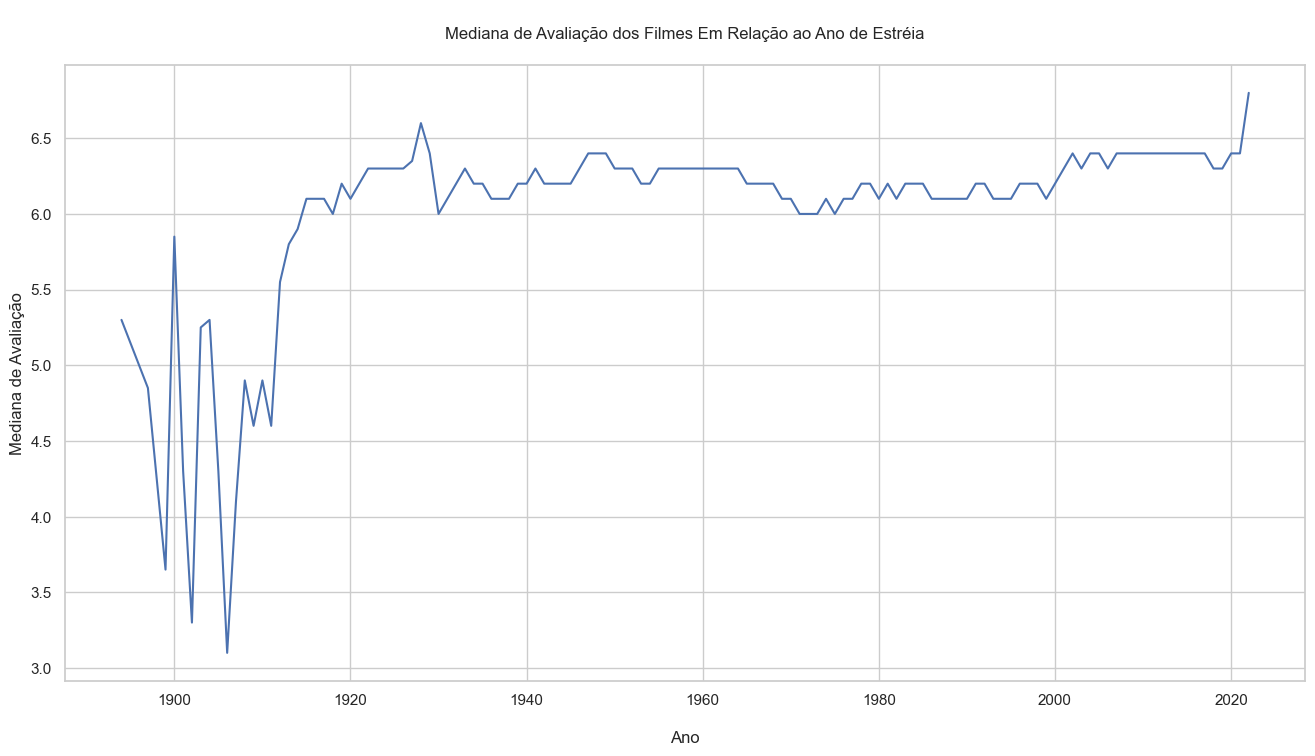

In [222]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()


# 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
#### Número de filmes por gênero. Vamos listar os Top 5.

In [223]:

# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [224]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [225]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9436212,"Action,Drama,Family"
9436213,"Action,Drama,Family"
9436214,"Action,Drama,Family"
9436215,Short


In [226]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [227]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [228]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count


In [229]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

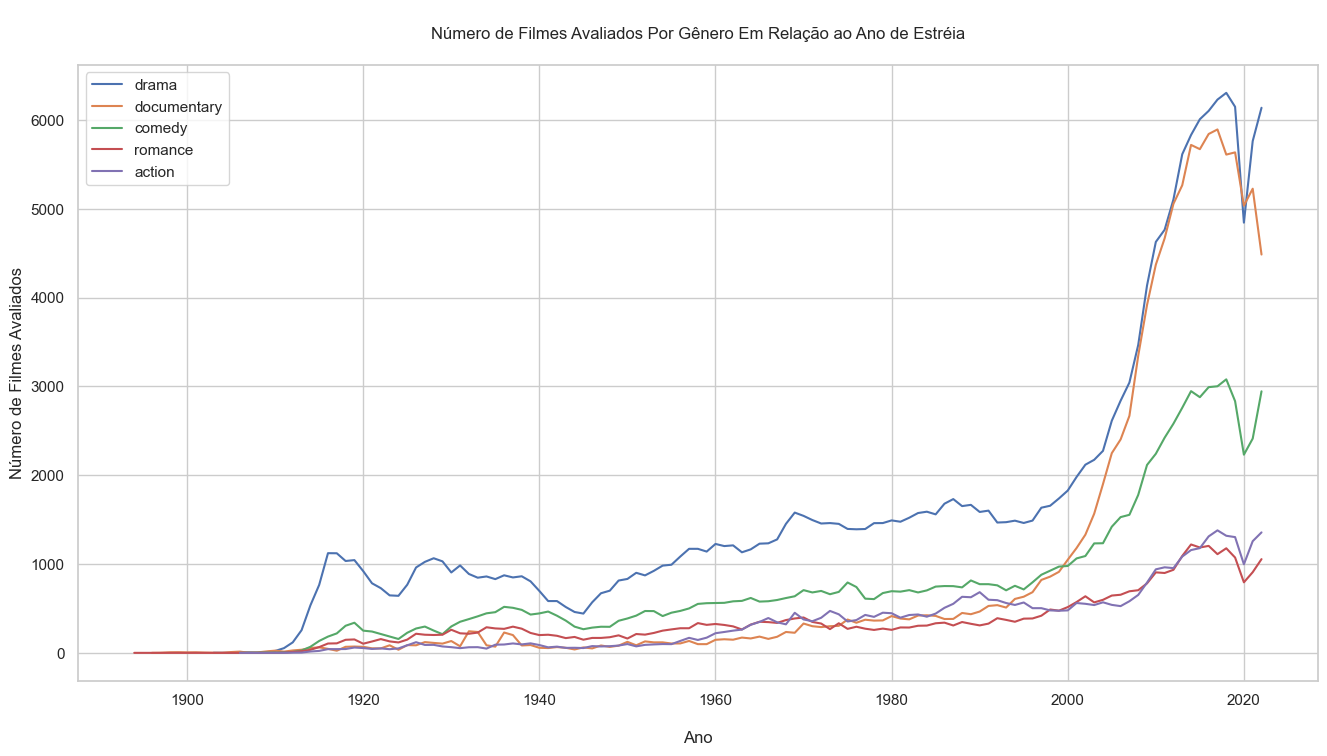

In [230]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()


# 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
#### Percentis e filme mais longo da história.

In [231]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 


In [232]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [233]:
display(resultado6)

,Runtime
0,45
1,100
2,100
3,70
4,90
...,...
397537,123
397538,57
397539,100
397540,116


In [234]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 49.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 54.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 68.2
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [235]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 


In [236]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [237]:
resultado6


,Runtime,primary_title
0,59460,100


# 7- Qual a Relação Entre Duração e Gênero?
#### Relação entre duração do filme e gênero.

In [238]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [239]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [240]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)


In [241]:
# Visualizar
generos_unicos


['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [242]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [243]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [244]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [245]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)


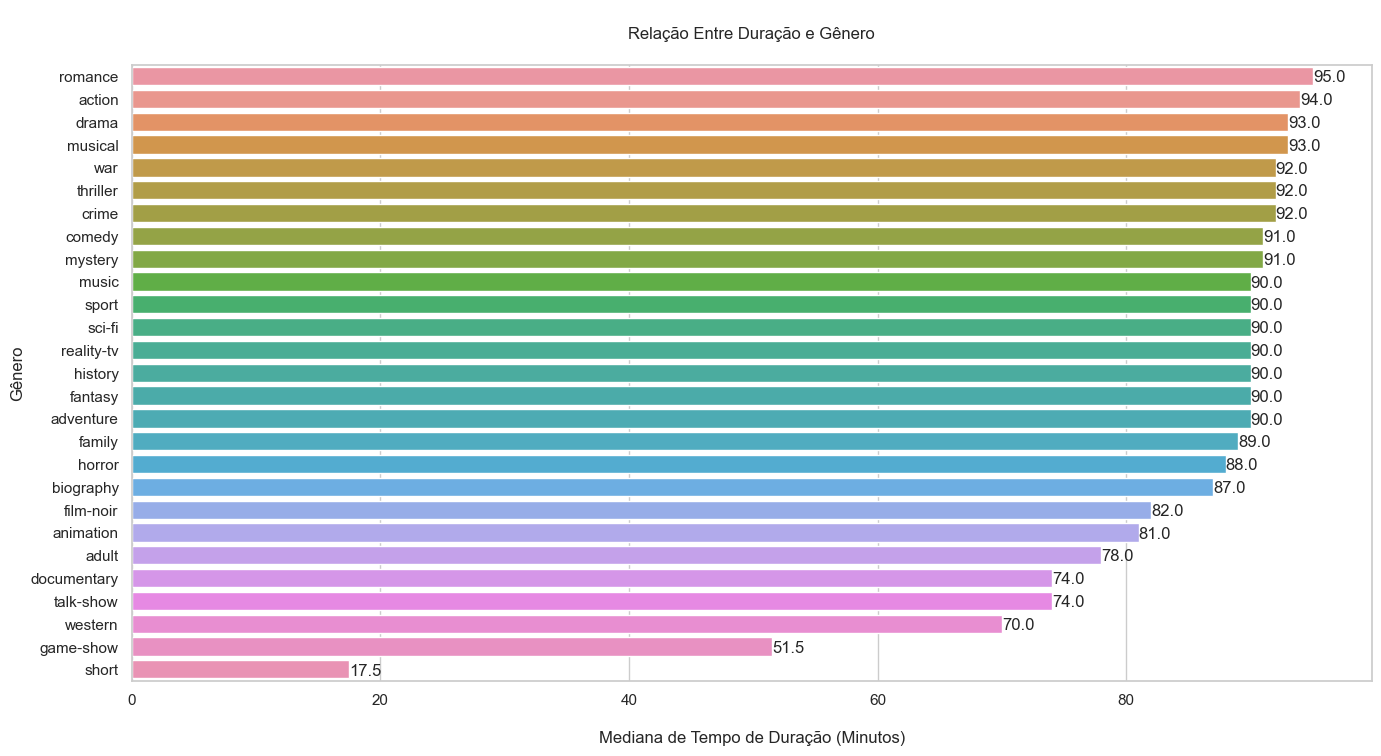

In [246]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()


# 8- Qual o Número de Filmes Produzidos Por País?
#### Número de filmes produzidos por país.

In [247]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 


In [248]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [249]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,8789
2,AF,112
3,AG,12
4,AL,1307
...,...,...
230,YUCS,152
231,ZA,12586
232,ZM,47
233,ZRCD,2


In [250]:

# Shape
resultado8.shape


(235, 2)

In [251]:
# Número de linhas
resultado8.shape[0]


235

In [252]:
# Listas auxiliares
nomes_paises = []
contagem = []


In [253]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue


In [254]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [255]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [256]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
200,United States,321418
66,United Kingdom,163105
97,Japan,95145
90,India,91984
64,France,87824
32,Canada,84433
48,Germany,75872
59,Spain,68613
94,Italy,68160
26,Brazil,67387


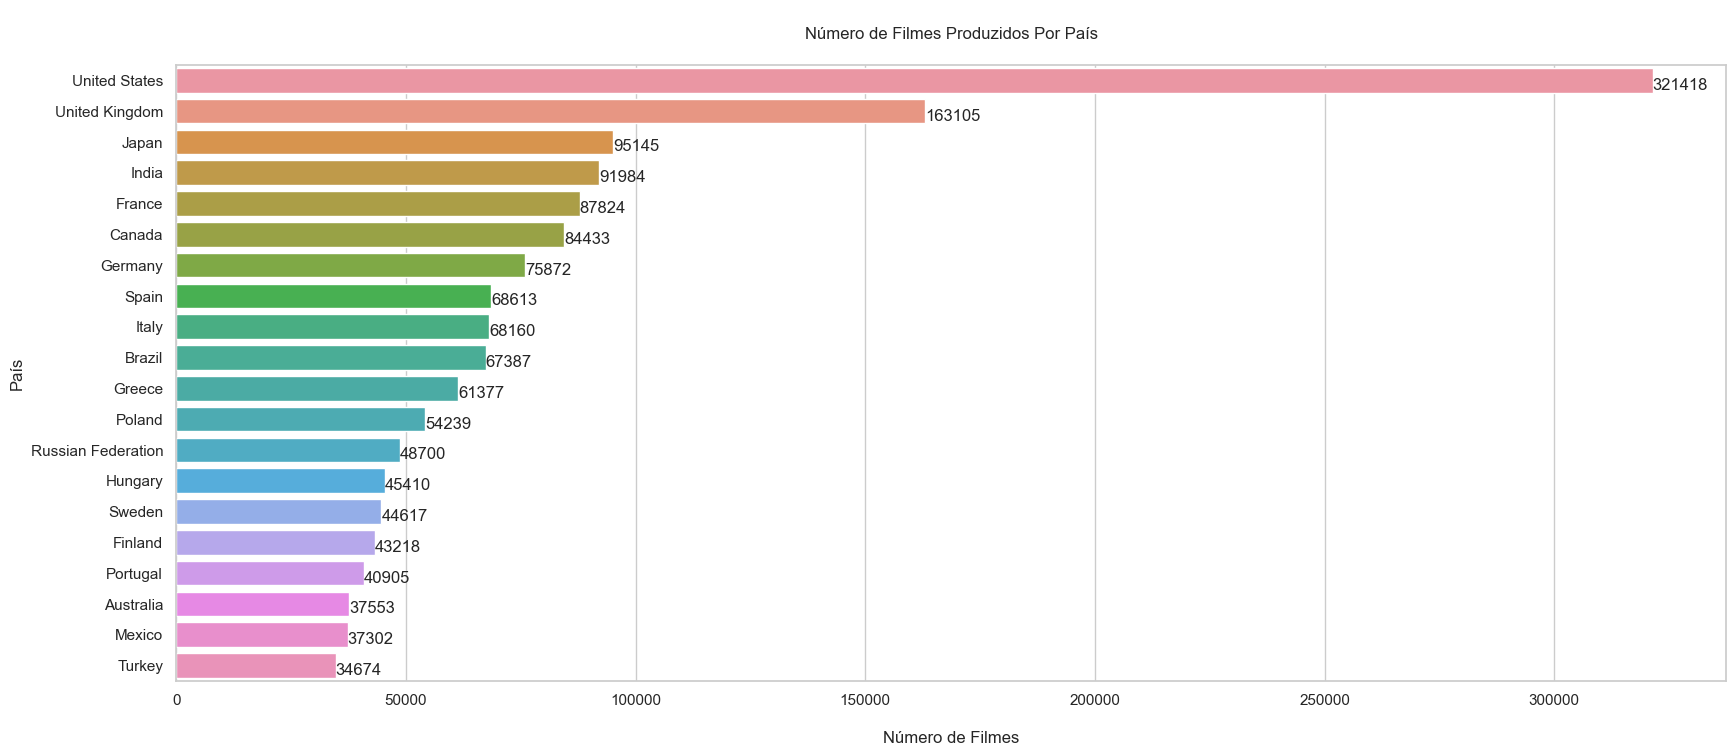

In [257]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()


# 9- Quais São os Top 10 Melhores Filmes?
#### Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [258]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [259]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)


In [260]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime,Drama",9.2
2,The Chaos Class,"Comedy,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


# 10- Quais São os Top 10 Piores Filmes?
#### Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [261]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [262]:

# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [264]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Action,Crime,Drama",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9
